In [128]:
'''
ROC(Receiver Operating Characteristic) curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.
This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one.
This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.
The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.
'''

'\nROC(Receiver Operating Characteristic) curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.\nThis means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one.\nThis is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.\nThe “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.\n'

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [130]:
#test and train dataset split

df = pd.read_csv('Feature/feature_tt.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [131]:
x = train.drop("Level", axis=1)
y = train["Level"]
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)


In [132]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4])
n_classes = y.shape[1]

In [133]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

In [134]:
# shuffle and split training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [135]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

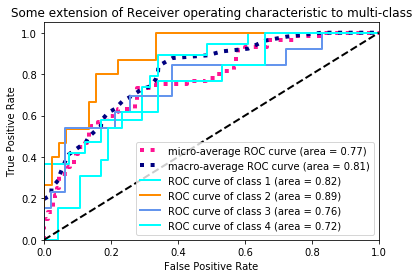

In [136]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()